### Using pinpoint to get interpolated value against a lat/lon

In [1]:
import os; os.chdir('../')
from pyscissor import pinpoint
import numpy as np
from netCDF4 import Dataset as nco,num2date
import pylab as pl
from datetime import datetime as dt
%config InlineBackend.figure_format = 'svg'

In [2]:
nf    = nco('data/sample_2.nc','r')
lats  = nf.variables['lat'][:]
lons  = nf.variables['lon'][:]
dates = num2date(nf.variables['time'][:],nf.variables['time'].units)
dt_ob = [dt(x.year,x.month,x.day,x.hour,x.minute) for x in dates]
data  = nf.variables['tmin'][:]

In [3]:
lat, lon = 23.54, 88.36

pin = pinpoint(lats,lons)
pin.set_xy(lat,lon)

# nearest neighbour
val_nn = data[:,pin.nn_id[0],pin.nn_id[1]]

# bilinear
val_bl = np.zeros(dates.shape,dtype=np.float32)

for t in range(dates.shape[0]):
    val_bl[t] = pin.bilinear( data[t,:,:])


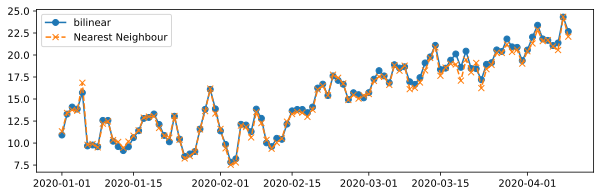

In [4]:
pl.figure(figsize=(10,3))
pl.plot(dt_ob, val_bl, '-o' , label='bilinear')
pl.plot(dt_ob, val_nn, 'x--', label='Nearest Neighbour')
pl.legend()